In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel("../../dataset/First Experiment/Austrian/Austrian(SKG_LIS).xlsx")
df = pd.DataFrame(data)

In [4]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,16:10:00,19:50:00,2,4,1,1,0,110,157.77
1,16:10:00,22:05:00,2,4,1,2,0,222,1260.47
2,16:10:00,22:00:00,2,4,1,2,0,224,2067.47
3,16:15:00,19:50:00,3,5,1,1,0,110,157.77
4,16:15:00,09:15:00,5,7,1,1,1,110,157.77


In [5]:
for i in df.columns:
  print(i,"\t\t-\t", df[i].isna().mean()*100)

departure_time 		-	 0.0
arrival_time 		-	 0.0
days_before 		-	 0.0
day_of_week 		-	 0.0
num_of_luggage 		-	 0.0
num_of_stops 		-	 0.0
overnight_flight 		-	 0.0
Class 		-	 0.0
price 		-	 0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 9 columns):
departure_time      606 non-null object
arrival_time        606 non-null object
days_before         606 non-null int64
day_of_week         606 non-null int64
num_of_luggage      606 non-null int64
num_of_stops        606 non-null int64
overnight_flight    606 non-null int64
Class               606 non-null int64
price               606 non-null float64
dtypes: float64(1), int64(6), object(2)
memory usage: 42.7+ KB


In [7]:
df.shape

(606, 9)

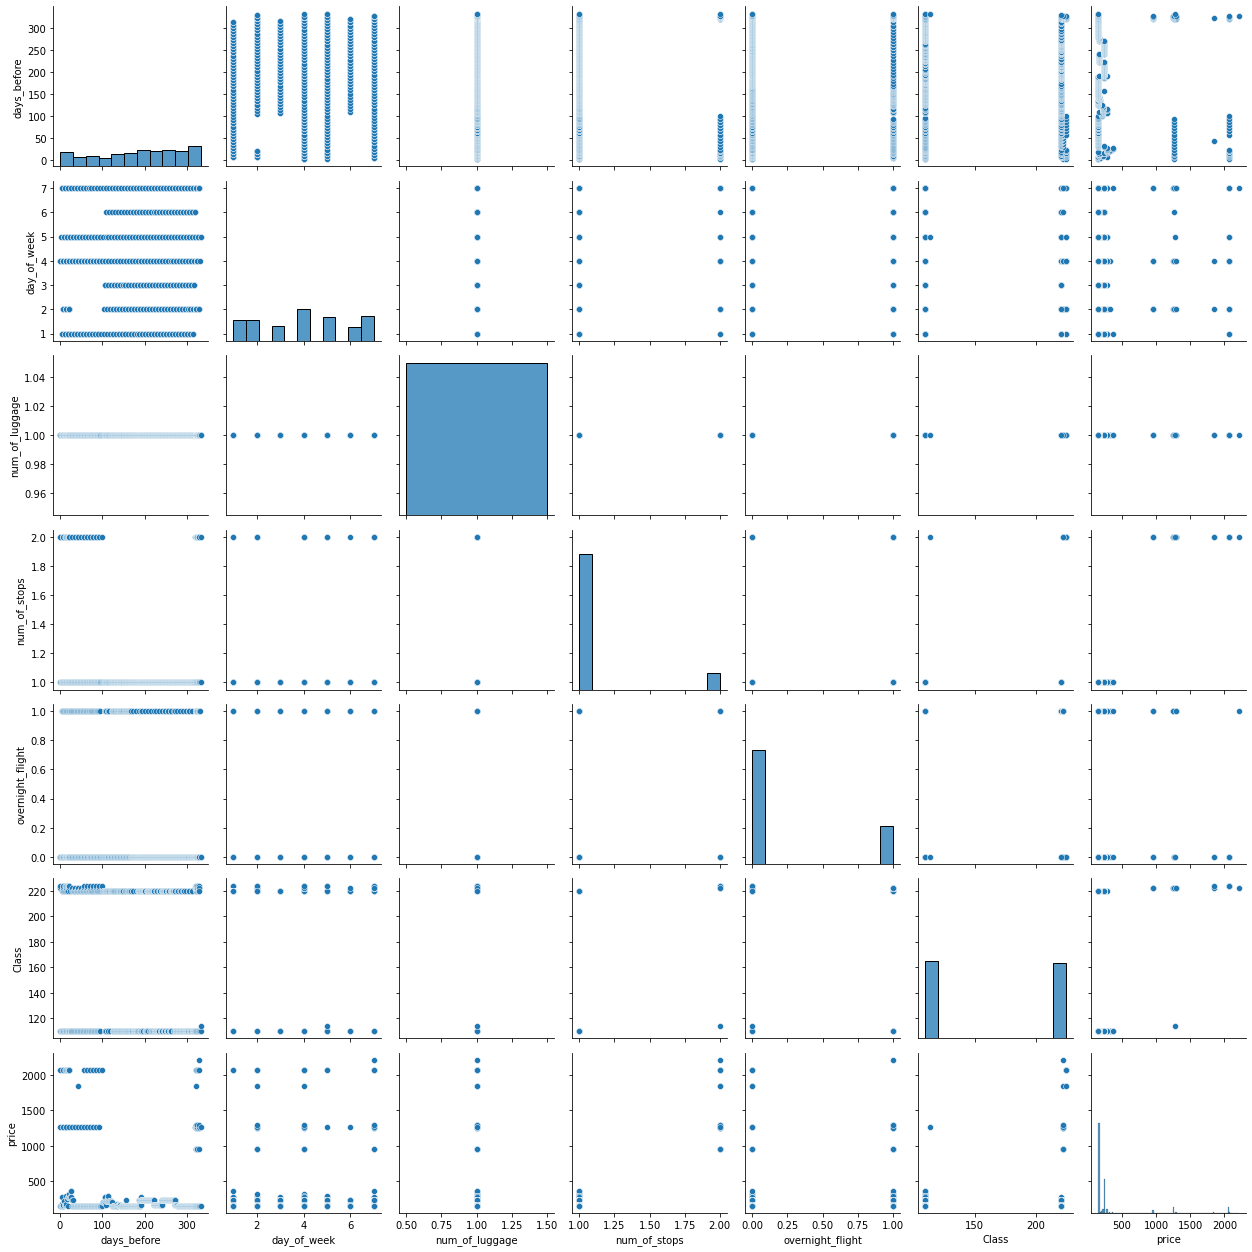

In [8]:
sns.pairplot(df)
plt.tight_layout()

In [9]:
df['departure_time'] = pd.to_datetime(df['departure_time'], format='%H:%M:%S')

In [10]:
df['arrival_time'] = pd.to_datetime(df['arrival_time'], format='%H:%M:%S')

In [11]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,1900-01-01 16:10:00,1900-01-01 19:50:00,2,4,1,1,0,110,157.77
1,1900-01-01 16:10:00,1900-01-01 22:05:00,2,4,1,2,0,222,1260.47
2,1900-01-01 16:10:00,1900-01-01 22:00:00,2,4,1,2,0,224,2067.47
3,1900-01-01 16:15:00,1900-01-01 19:50:00,3,5,1,1,0,110,157.77
4,1900-01-01 16:15:00,1900-01-01 09:15:00,5,7,1,1,1,110,157.77


In [12]:
df['departuretime'] = pd.to_datetime(df['departure_time']).astype(np.int64)

In [13]:
df['arrivaltime'] = pd.to_datetime(df['arrival_time']).astype(np.int64)

In [14]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price,departuretime,arrivaltime
0,1900-01-01 16:10:00,1900-01-01 19:50:00,2,4,1,1,0,110,157.77,-2208930600000000000,-2208917400000000000
1,1900-01-01 16:10:00,1900-01-01 22:05:00,2,4,1,2,0,222,1260.47,-2208930600000000000,-2208909300000000000
2,1900-01-01 16:10:00,1900-01-01 22:00:00,2,4,1,2,0,224,2067.47,-2208930600000000000,-2208909600000000000
3,1900-01-01 16:15:00,1900-01-01 19:50:00,3,5,1,1,0,110,157.77,-2208930300000000000,-2208917400000000000
4,1900-01-01 16:15:00,1900-01-01 09:15:00,5,7,1,1,1,110,157.77,-2208930300000000000,-2208955500000000000


In [15]:
df.columns

Index(['departure_time', 'arrival_time', 'days_before', 'day_of_week',
       'num_of_luggage', 'num_of_stops', 'overnight_flight', 'Class', 'price',
       'departuretime', 'arrivaltime'],
      dtype='object')

In [16]:
df = df[['departuretime','arrivaltime','day_of_week', 'days_before','num_of_luggage', 'num_of_stops', 'overnight_flight','Class','price']]

In [17]:
del df['departuretime']

In [18]:
del df['arrivaltime']

In [19]:
#df = df.apply(np.int64)

In [20]:
df.head()

,day_of_week,days_before,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,4,2,1,1,0,110,157.77
1,4,2,1,2,0,222,1260.47
2,4,2,1,2,0,224,2067.47
3,5,3,1,1,0,110,157.77
4,7,5,1,1,1,110,157.77


In [21]:
df.to_csv('skg_lis_proc.csv')

In [22]:
X = df.drop(['price'], axis=1)
y = df['price']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

In [1]:
ML_Model = []
accuracy = []

#function to call for storing the results
def storeResults(model, a):
    ML_Model.append(model)
    accuracy.append(round(a, 3))

# AdaBoost

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [25]:
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)

In [26]:
from sklearn.ensemble import AdaBoostRegressor
search_grid={'n_estimators':[5000,10000,20000],'learning_rate':[.001,0.01,.1],'random_state':[1]}
adr = AdaBoostRegressor()
search=GridSearchCV(estimator=adr,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=crossvalidation)
search.fit(X_train,y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=AdaBoostRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [5000, 10000, 20000],
                         'random_state': [1]},
             scoring='neg_mean_squared_error')

In [27]:
y_pred = search.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.9802336670417462


In [4]:
ab_sc = r2_score(y_test, y_pred)
storeResults('AdaBoost',ab_sc)

# Bagging Regressor

In [28]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

clf = BaggingRegressor(DecisionTreeRegressor(),n_estimators=10000, random_state=0)

clf.fit(X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10000,
                 random_state=0)

In [29]:
y_pred = clf.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.9891687443281142


In [5]:
bag_sc = r2_score(y_test, y_pred)
storeResults('Bagging',bag_sc)

# Gradient Boosting

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=10000, random_state=0)

gbr.fit(X_train,y_train)

y_pred = gbr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.9900548182629114


In [6]:
gb_sc = r2_score(y_test, y_pred)
storeResults('Gradient Boosting',gb_sc)

# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=0)

dtr.fit(X_train,y_train)

y_pred = dtr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.9899722619813823


In [7]:
dt_sc = r2_score(y_test, y_pred)
storeResults('Decision Tree',dt_sc)

# RAndom Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

rfr = RandomForestRegressor(max_depth=2, random_state=0)

grid_forest = GridSearchCV(rfr,param_grid=param_grid)

grid_forest.fit(X_train,y_train)

y_pred = grid_forest.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.9591702953252808


In [8]:
rf_sc = r2_score(y_test, y_pred)
storeResults('Random Forest',rf_sc)

# Extra Tree

In [33]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor(n_estimators=10000, random_state=0)

etr.fit(X_train,y_train)

y_pred = etr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.9900546921322411


In [9]:
et_sc = r2_score(y_test, y_pred)
storeResults('Extra Tree',et_sc)

# SVR

In [34]:
from sklearn.svm import SVR

sr = SVR(C=1.0, epsilon=0.2)

sr.fit(X_train,y_train)

y_pred = sr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: -0.13208860996128302


In [10]:
svr_sc = r2_score(y_test, y_pred)
storeResults('SVR',svr_sc)

# MLP

In [35]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=1, max_iter=500)
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.3083909037748932


In [11]:
mlp_sc = r2_score(y_test, y_pred)
storeResults('MLP',mlp_sc)

# DL

In [36]:
X_train = np.array(X).reshape(X.shape[0], X.shape[1], 1)
X_test = np.array(X).reshape(X.shape[0], X.shape[1], 1)

In [37]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Create 2 virtual GPUs with 1GB memory each
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=1024),
         tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPU, 2 Logical GPUs


In [38]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

# VGG11

In [39]:
def vgg11():
    
    model = Sequential()
    
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(128, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [40]:
model = vgg11()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 6, 32)             128       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 6, 64)             6208      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 6, 128)            41088     
_________________________________________________________________
flatten (Flatten)            (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                38450     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2

In [41]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

Epoch 1/200
16/16 [==============================] - 3s 14ms/step - loss: 234248.6406 - val_loss: 268047.7500
Epoch 2/200
16/16 [==============================] - 0s 4ms/step - loss: 177414.1094 - val_loss: 280485.1875
Epoch 3/200
16/16 [==============================] - 0s 4ms/step - loss: 142195.5000 - val_loss: 398144.9375
Epoch 4/200
16/16 [==============================] - 0s 4ms/step - loss: 121843.2344 - val_loss: 332995.2188
Epoch 5/200
16/16 [==============================] - 0s 4ms/step - loss: 119786.6641 - val_loss: 383187.2188
Epoch 6/200
16/16 [==============================] - 0s 4ms/step - loss: 118491.1016 - val_loss: 284351.7812
Epoch 7/200
16/16 [==============================] - 0s 4ms/step - loss: 118530.9062 - val_loss: 364660.9688
Epoch 8/200
16/16 [==============================] - 0s 4ms/step - loss: 116217.5547 - val_loss: 292965.8438
Epoch 9/200
16/16 [==============================] - 0s 4ms/step - loss: 113603.8594 - val_loss: 366092.0312
Epoch 10/200
16/16

Epoch 76/200
16/16 [==============================] - 0s 4ms/step - loss: 58528.5117 - val_loss: 299467.0938
Epoch 77/200
16/16 [==============================] - 0s 5ms/step - loss: 40960.3164 - val_loss: 339791.2188
Epoch 78/200
16/16 [==============================] - 0s 5ms/step - loss: 36753.9062 - val_loss: 290580.8438
Epoch 79/200
16/16 [==============================] - 0s 5ms/step - loss: 23929.6484 - val_loss: 291228.1250
Epoch 80/200
16/16 [==============================] - 0s 5ms/step - loss: 22721.3359 - val_loss: 331465.2188
Epoch 81/200
16/16 [==============================] - 0s 5ms/step - loss: 22065.5977 - val_loss: 316486.8750
Epoch 82/200
16/16 [==============================] - 0s 5ms/step - loss: 24967.7070 - val_loss: 318812.1875
Epoch 83/200
16/16 [==============================] - 0s 5ms/step - loss: 18029.0840 - val_loss: 308313.0625
Epoch 84/200
16/16 [==============================] - 0s 5ms/step - loss: 20527.1543 - val_loss: 325314.2188
Epoch 85/200
16/16 

In [42]:
y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Accuracy score of the predictions: 0.6066474513359966


In [12]:
vgg_sc = r2_score(y, y_pred)
storeResults('VGG11',vgg_sc)

# VGG13

In [43]:
def vgg13():
    
    model = Sequential()
    
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(64, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [44]:
model = vgg13()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 6, 16)             64        
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 6, 32)             1568      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 6, 64)             10304     
_________________________________________________________________
flatten_1 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                19250     
_________________________________________________________________
dense_4 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [45]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

Epoch 1/200
16/16 [==============================] - 1s 15ms/step - loss: 228384.7812 - val_loss: 277850.5938
Epoch 2/200
16/16 [==============================] - 0s 5ms/step - loss: 178788.6406 - val_loss: 287428.7188
Epoch 3/200
16/16 [==============================] - 0s 5ms/step - loss: 147904.5469 - val_loss: 310152.0625
Epoch 4/200
16/16 [==============================] - 0s 5ms/step - loss: 130057.7969 - val_loss: 380617.2500
Epoch 5/200
16/16 [==============================] - 0s 5ms/step - loss: 122154.2188 - val_loss: 308285.6250
Epoch 6/200
16/16 [==============================] - 0s 5ms/step - loss: 121260.3828 - val_loss: 338023.5938
Epoch 7/200
16/16 [==============================] - 0s 5ms/step - loss: 115335.2891 - val_loss: 354735.5938
Epoch 8/200
16/16 [==============================] - 0s 5ms/step - loss: 113459.0547 - val_loss: 307133.0625
Epoch 9/200
16/16 [==============================] - 0s 5ms/step - loss: 113181.2422 - val_loss: 351740.7188
Epoch 10/200
16/16

Epoch 150/200
16/16 [==============================] - 0s 5ms/step - loss: 16643.8613 - val_loss: 317669.5625
Epoch 151/200
16/16 [==============================] - 0s 5ms/step - loss: 16177.5605 - val_loss: 326613.4375
Epoch 152/200
16/16 [==============================] - 0s 5ms/step - loss: 15201.5928 - val_loss: 324855.6875
Epoch 153/200
16/16 [==============================] - 0s 5ms/step - loss: 14916.1797 - val_loss: 327269.0312
Epoch 154/200
16/16 [==============================] - 0s 5ms/step - loss: 14502.9639 - val_loss: 329226.6250
Epoch 155/200
16/16 [==============================] - 0s 5ms/step - loss: 15348.9717 - val_loss: 328452.8750
Epoch 156/200
16/16 [==============================] - 0s 5ms/step - loss: 15760.1387 - val_loss: 304854.1562
Epoch 157/200
16/16 [==============================] - 0s 5ms/step - loss: 12954.4561 - val_loss: 337766.6875
Epoch 158/200
16/16 [==============================] - 0s 5ms/step - loss: 13393.3857 - val_loss: 343981.5000
Epoch 159/

In [46]:
y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Accuracy score of the predictions: 0.5876684482695518


In [13]:
vgg1_sc = r2_score(y, y_pred)
storeResults('VGG13',vgg1_sc)

# ResNet18

In [47]:
def resnet18():
    
    model = Sequential()
    
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(64, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = resnet18()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 6, 16)             64        
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 6, 32)             1568      
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 6, 64)             10304     
_________________________________________________________________
flatten_2 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                19250     
_________________________________________________________________
dense_7 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [48]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
16/16 [==============================] - 0s 10ms/step - loss: 219245.0312 - val_loss: 267889.9688
Epoch 2/200
16/16 [==============================] - 0s 5ms/step - loss: 180822.6562 - val_loss: 280564.2500
Epoch 3/200
16/16 [==============================] - 0s 5ms/step - loss: 156095.2344 - val_loss: 332449.5312
Epoch 4/200
16/16 [==============================] - 0s 5ms/step - loss: 140851.8281 - val_loss: 386485.0625
Epoch 5/200
16/16 [==============================] - 0s 5ms/step - loss: 131155.6250 - val_loss: 321910.5625
Epoch 6/200
16/16 [==============================] - 0s 5ms/step - loss: 118241.2734 - val_loss: 342688.4062
Epoch 7/200
16/16 [==============================] - 0s 5ms/step - loss: 113167.0625 - val_loss: 331007.8750
Epoch 8/200
16/16 [==============================] - 0s 5ms/step - loss: 114299.4844 - val_loss: 348713.2500
Epoch 9/200
16/16 [==============================] - 0s 5ms/step - loss: 114589.6328 - val_loss: 307933.8438
Epoch 10/200
16/16

Epoch 150/200
16/16 [==============================] - 0s 5ms/step - loss: 21739.7695 - val_loss: 318999.0938
Epoch 151/200
16/16 [==============================] - 0s 5ms/step - loss: 17859.4746 - val_loss: 326359.4062
Epoch 152/200
16/16 [==============================] - 0s 5ms/step - loss: 14833.9814 - val_loss: 313854.2188
Epoch 153/200
16/16 [==============================] - 0s 5ms/step - loss: 17366.7520 - val_loss: 320303.9375
Epoch 154/200
16/16 [==============================] - 0s 5ms/step - loss: 14942.5771 - val_loss: 324037.4375
Epoch 155/200
16/16 [==============================] - 0s 5ms/step - loss: 17569.0254 - val_loss: 319367.4375
Epoch 156/200
16/16 [==============================] - 0s 5ms/step - loss: 14672.9873 - val_loss: 321294.3750
Epoch 157/200
16/16 [==============================] - 0s 5ms/step - loss: 20048.5410 - val_loss: 315533.7500
Epoch 158/200
16/16 [==============================] - 0s 5ms/step - loss: 15609.1016 - val_loss: 281688.1562
Epoch 159/

In [14]:
res18_sc = r2_score(y, y_pred)
storeResults('ResNet18',res18_sc)

# ResNet34

In [49]:
def resnet34():
    
    model = Sequential()
    
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(128, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(516, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = resnet34()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 6, 64)             256       
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 6, 128)            24704     
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 6, 516)            330756    
_________________________________________________________________
flatten_3 (Flatten)          (None, 3096)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 50)                154850    
_________________________________________________________________
dense_10 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [50]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
16/16 [==============================] - 1s 19ms/step - loss: 218253.1250 - val_loss: 285330.7500
Epoch 2/200
16/16 [==============================] - 0s 5ms/step - loss: 165398.3438 - val_loss: 294005.3438
Epoch 3/200
16/16 [==============================] - 0s 5ms/step - loss: 131732.0781 - val_loss: 345517.1250
Epoch 4/200
16/16 [==============================] - 0s 5ms/step - loss: 118283.3750 - val_loss: 323732.5938
Epoch 5/200
16/16 [==============================] - 0s 5ms/step - loss: 111310.5625 - val_loss: 314001.5312
Epoch 6/200
16/16 [==============================] - 0s 5ms/step - loss: 112261.4844 - val_loss: 332233.3125
Epoch 7/200
16/16 [==============================] - 0s 5ms/step - loss: 119758.8672 - val_loss: 305018.7812
Epoch 8/200
16/16 [==============================] - 0s 5ms/step - loss: 129430.4297 - val_loss: 329857.1562
Epoch 9/200
16/16 [==============================] - 0s 5ms/step - loss: 113382.4688 - val_loss: 321304.5938
Epoch 10/200
16/16

Epoch 76/200
16/16 [==============================] - 0s 5ms/step - loss: 26599.8672 - val_loss: 321050.2812
Epoch 77/200
16/16 [==============================] - 0s 5ms/step - loss: 27369.9863 - val_loss: 319398.8438
Epoch 78/200
16/16 [==============================] - 0s 5ms/step - loss: 17581.8809 - val_loss: 312030.1875
Epoch 79/200
16/16 [==============================] - 0s 5ms/step - loss: 18492.2578 - val_loss: 309580.1562
Epoch 80/200
16/16 [==============================] - 0s 5ms/step - loss: 17362.3672 - val_loss: 284777.5938
Epoch 81/200
16/16 [==============================] - 0s 5ms/step - loss: 37944.0977 - val_loss: 303055.2188
Epoch 82/200
16/16 [==============================] - 0s 5ms/step - loss: 25001.0293 - val_loss: 315558.8125
Epoch 83/200
16/16 [==============================] - 0s 5ms/step - loss: 16671.6387 - val_loss: 312960.8750
Epoch 84/200
16/16 [==============================] - 0s 5ms/step - loss: 15794.6094 - val_loss: 310771.3438
Epoch 85/200
16/16 

In [15]:
res34_sc = r2_score(y, y_pred)
storeResults('ResNet34',res34_sc)

# MobileNetv1

In [51]:
def mobilenetv1():
    
    model = Sequential()
    
    model.add(Conv1D(8, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(32, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = mobilenetv1()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 6, 8)              32        
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 6, 16)             400       
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 6, 32)             2592      
_________________________________________________________________
flatten_4 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)                9650      
_________________________________________________________________
dense_13 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                

In [52]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
16/16 [==============================] - 1s 15ms/step - loss: 242699.8906 - val_loss: 378815.4688
Epoch 2/200
16/16 [==============================] - 0s 5ms/step - loss: 191854.3750 - val_loss: 262555.1875
Epoch 3/200
16/16 [==============================] - 0s 6ms/step - loss: 171215.2500 - val_loss: 292312.9062
Epoch 4/200
16/16 [==============================] - 0s 5ms/step - loss: 155596.7500 - val_loss: 288636.1562
Epoch 5/200
16/16 [==============================] - 0s 6ms/step - loss: 143848.1094 - val_loss: 357136.9062
Epoch 6/200
16/16 [==============================] - 0s 5ms/step - loss: 135044.8750 - val_loss: 371680.3125
Epoch 7/200
16/16 [==============================] - 0s 5ms/step - loss: 128211.4062 - val_loss: 345236.7188
Epoch 8/200
16/16 [==============================] - 0s 5ms/step - loss: 121918.4453 - val_loss: 357752.8438
Epoch 9/200
16/16 [==============================] - 0s 5ms/step - loss: 115960.4375 - val_loss: 326866.6875
Epoch 10/200
16/16

16/16 [==============================] - 0s 5ms/step - loss: 98672.8594 - val_loss: 329283.1562
Epoch 150/200
16/16 [==============================] - 0s 5ms/step - loss: 100266.8828 - val_loss: 308155.5938
Epoch 151/200
16/16 [==============================] - 0s 6ms/step - loss: 99635.6328 - val_loss: 316126.5000
Epoch 152/200
16/16 [==============================] - 0s 5ms/step - loss: 102351.0469 - val_loss: 307383.3438
Epoch 153/200
16/16 [==============================] - 0s 5ms/step - loss: 104183.3828 - val_loss: 351398.8125
Epoch 154/200
16/16 [==============================] - 0s 5ms/step - loss: 106982.5391 - val_loss: 292334.1875
Epoch 155/200
16/16 [==============================] - 0s 5ms/step - loss: 106222.0156 - val_loss: 361728.0938
Epoch 156/200
16/16 [==============================] - 0s 5ms/step - loss: 100748.5078 - val_loss: 302557.8750
Epoch 157/200
16/16 [==============================] - 0s 5ms/step - loss: 99950.5938 - val_loss: 316684.1250
Epoch 158/200
16/1

In [16]:
mob1_sc = r2_score(y, y_pred)
storeResults('MobileNetV1',mob1_sc)

# MobileNetV2

In [53]:
def mobilenetv2():
    
    model = Sequential()
    
    model.add(Conv1D(128, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(516, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(1024, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = mobilenetv2()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 6, 128)            512       
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 6, 516)            198660    
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 6, 1024)           2642944   
_________________________________________________________________
flatten_5 (Flatten)          (None, 6144)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 50)                307250    
_________________________________________________________________
dense_16 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

In [54]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
16/16 [==============================] - 1s 20ms/step - loss: 188422.9219 - val_loss: 361995.3438
Epoch 2/200
16/16 [==============================] - 0s 6ms/step - loss: 122262.5859 - val_loss: 269147.4062
Epoch 3/200
16/16 [==============================] - 0s 6ms/step - loss: 125743.5156 - val_loss: 261374.1406
Epoch 4/200
16/16 [==============================] - 0s 6ms/step - loss: 157173.7500 - val_loss: 378438.4375
Epoch 5/200
16/16 [==============================] - 0s 6ms/step - loss: 120825.0312 - val_loss: 378290.3125
Epoch 6/200
16/16 [==============================] - 0s 6ms/step - loss: 113903.2500 - val_loss: 309164.0938
Epoch 7/200
16/16 [==============================] - 0s 6ms/step - loss: 117003.9766 - val_loss: 330615.2188
Epoch 8/200
16/16 [==============================] - 0s 6ms/step - loss: 113981.7266 - val_loss: 351004.9688
Epoch 9/200
16/16 [==============================] - 0s 6ms/step - loss: 127279.6094 - val_loss: 286710.8125
Epoch 10/200
16/16

Epoch 76/200
16/16 [==============================] - 0s 6ms/step - loss: 14570.1982 - val_loss: 273999.5000
Epoch 77/200
16/16 [==============================] - 0s 6ms/step - loss: 14865.2686 - val_loss: 287742.3125
Epoch 78/200
16/16 [==============================] - 0s 6ms/step - loss: 19957.6504 - val_loss: 319188.7812
Epoch 79/200
16/16 [==============================] - 0s 6ms/step - loss: 17733.8574 - val_loss: 241972.6875
Epoch 80/200
16/16 [==============================] - 0s 6ms/step - loss: 16000.9268 - val_loss: 267514.8438
Epoch 81/200
16/16 [==============================] - 0s 6ms/step - loss: 15303.9648 - val_loss: 303234.9062
Epoch 82/200
16/16 [==============================] - 0s 6ms/step - loss: 13961.7939 - val_loss: 280665.3125
Epoch 83/200
16/16 [==============================] - 0s 6ms/step - loss: 14893.6152 - val_loss: 276779.9375
Epoch 84/200
16/16 [==============================] - 0s 6ms/step - loss: 14961.2500 - val_loss: 291844.2812
Epoch 85/200
16/16 

In [17]:
mob2_sc = r2_score(y, y_pred)
storeResults('MobileNetV2',mob2_sc)

# Comparison

In [18]:
#creating dataframe
import pandas as pd
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'R2-Score' : accuracy,
                      })

In [19]:
result

,ML Model,R2-Score
0,AdaBoost,0.980
1,Bagging,0.989
2,Gradient Boosting,0.990
3,Decision Tree,0.990
4,Random Forest,0.959
5,Extra Tree,0.990
6,SVR,0.132
7,MLP,0.308
8,VGG11,0.607
9,VGG13,0.588


# Graph

In [20]:
import numpy as np
classifier = ML_Model
y_pos = np.arange(len(classifier))

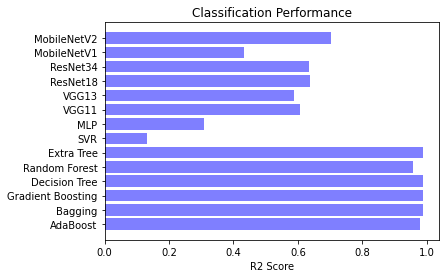

In [21]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('R2 Score')
plt2.title('Classification Performance')
plt2.show()